# Rolling Stones Spotify

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
df = pd.read_csv('rolling_stones_spotify.csv')

# Display dataset

In [3]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [4]:
df.shape

(1610, 18)

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()

In [6]:
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [7]:
df.duplicated().sum()

0

In [8]:
# Check for missing values
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [9]:
df = df.drop(['id', 'uri', 'release_date', 'track_number'], axis=1 )

In [10]:
df.head()

,Unnamed: 0,name,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [11]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms'],
      dtype='object')

In [12]:
# Describe dataset
df.describe()

,Unnamed: 0,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   acousticness      1610 non-null   float64
 4   danceability      1610 non-null   float64
 5   energy            1610 non-null   float64
 6   instrumentalness  1610 non-null   float64
 7   liveness          1610 non-null   float64
 8   loudness          1610 non-null   float64
 9   speechiness       1610 non-null   float64
 10  tempo             1610 non-null   float64
 11  valence           1610 non-null   float64
 12  popularity        1610 non-null   int64  
 13  duration_ms       1610 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 176.2+ KB


# Exploratory Data Analysis (EDA)

In [14]:
correlation_matrix = df.corr()

In [15]:
correlation_matrix

,Unnamed: 0,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
Unnamed: 0,1.000000,0.107246,0.341829,-0.425935,0.023308,-0.494153,-0.454868,-0.298203,-0.015240,0.281084,0.016173,-0.321300
acousticness,0.107246,1.000000,0.070017,-0.363819,0.061403,-0.117739,-0.237083,-0.021774,-0.171003,-0.138803,0.108046,0.039128
danceability,0.341829,0.070017,1.000000,-0.300536,-0.031812,-0.516387,-0.249406,-0.322684,-0.324398,0.546210,0.141205,-0.220045
energy,-0.425935,-0.363819,-0.300536,1.000000,0.120261,0.511188,0.698039,0.417214,0.201885,0.046217,-0.057272,0.148876
instrumentalness,0.023308,0.061403,-0.031812,0.120261,1.000000,0.008873,0.012524,0.009586,0.010961,0.103480,-0.010612,-0.137599
liveness,-0.494153,-0.117739,-0.516387,0.511188,0.008873,1.000000,0.327036,0.400018,0.108855,-0.347451,-0.205845,0.304735
loudness,-0.454868,-0.237083,-0.249406,0.698039,0.012524,0.327036,1.000000,0.189904,0.112837,-0.027571,0.156323,0.221558
speechiness,-0.298203,-0.021774,-0.322684,0.417214,0.009586,0.400018,0.189904,1.000000,0.192687,-0.399751,-0.136745,0.114546
tempo,-0.015240,-0.171003,-0.324398,0.201885,0.010961,0.108855,0.112837,0.192687,1.000000,0.000558,-0.061061,0.001465
valence,0.281084,-0.138803,0.546210,0.046217,0.103480,-0.347451,-0.027571,-0.399751,0.000558,1.000000,0.065333,-0.244833


In [16]:
import seaborn as sns

<AxesSubplot:>

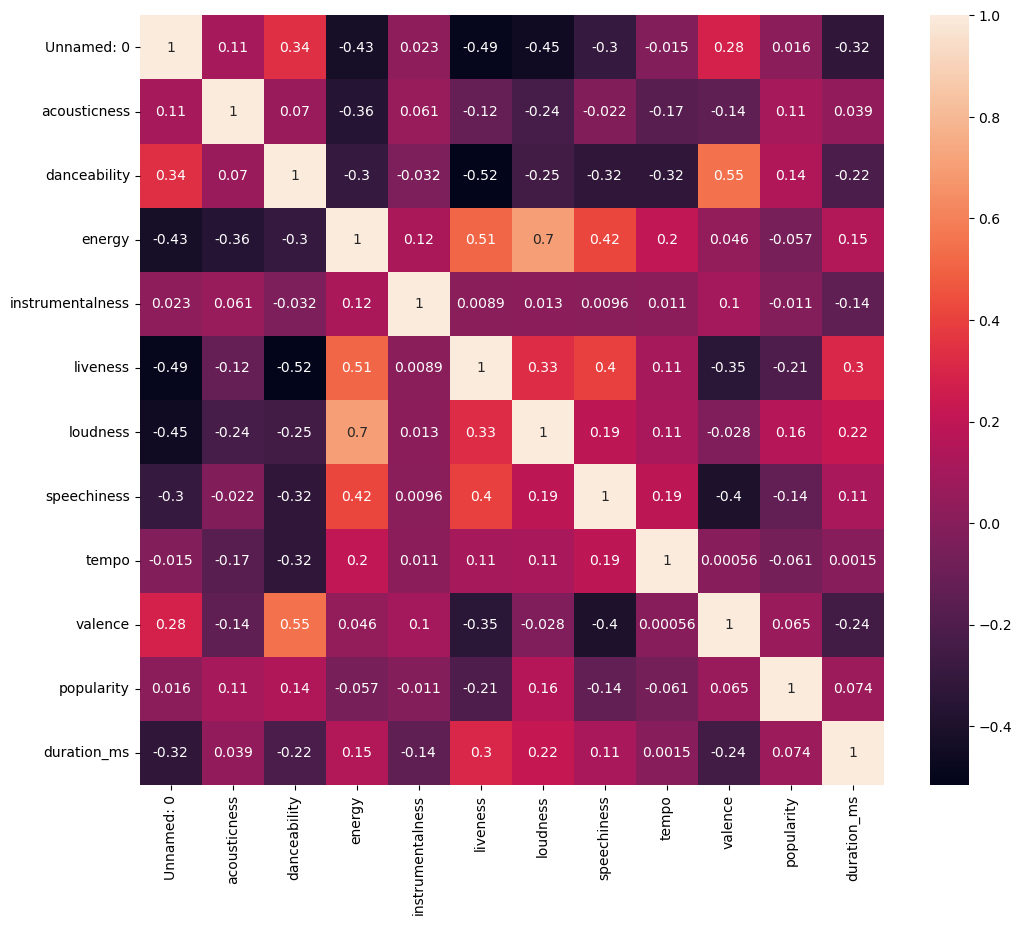

In [17]:
plt.figure(figsize=[12,10])
sns.heatmap(correlation_matrix,annot=True)

The correlation matrix shows that popularity is positively correlated with  acousticness, danceability, loudness, valence, popularity, duration and negatively correlated with  energy, instrumentalness, liveness, speechiness & tempo.
The strong correlation is seen between valence & danceability, the energy is strongly correlated with livenes, loudness & speechiness,

In [18]:
df_sub = df[[ 'album', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms'
               ]]

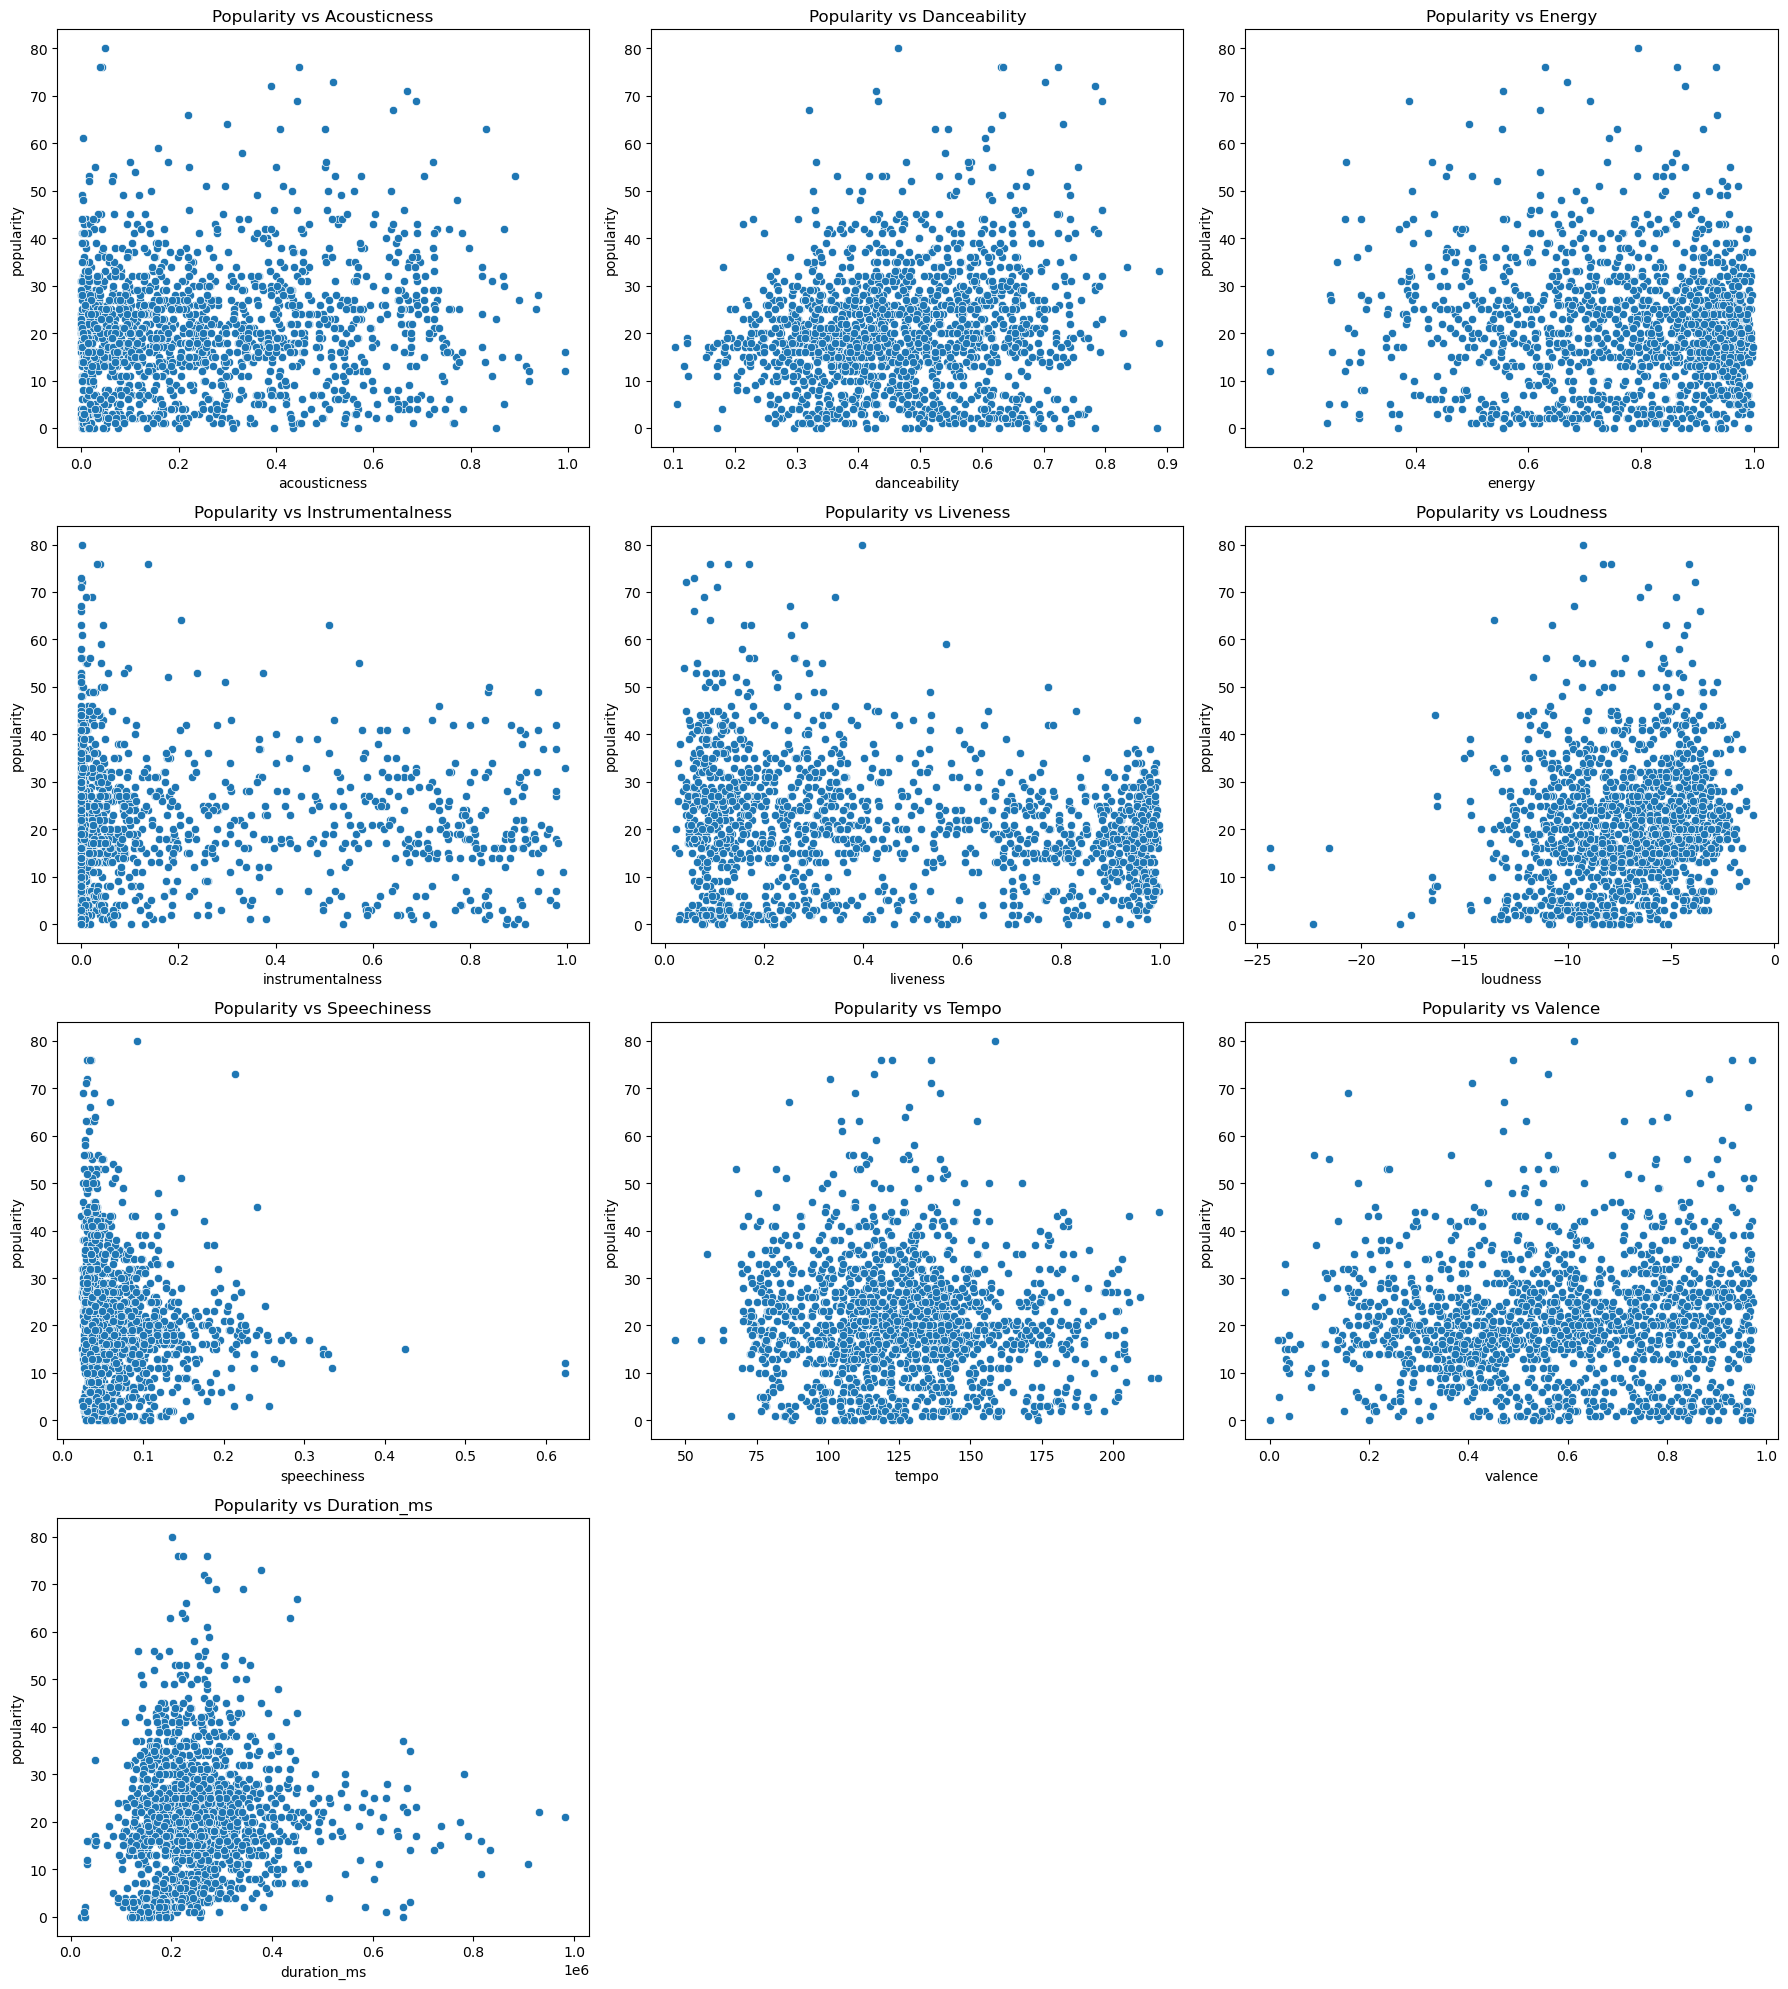

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the features to plot against popularity
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
            'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']

# Set up the number of subplots
num_features = len(features)
num_cols = 3  # Number of columns in the plot grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate the number of rows needed

# Set up the matplotlib figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature against popularity
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='popularity', ax=axes[i])
    axes[i].set_title(f'Popularity vs {feature.capitalize()}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


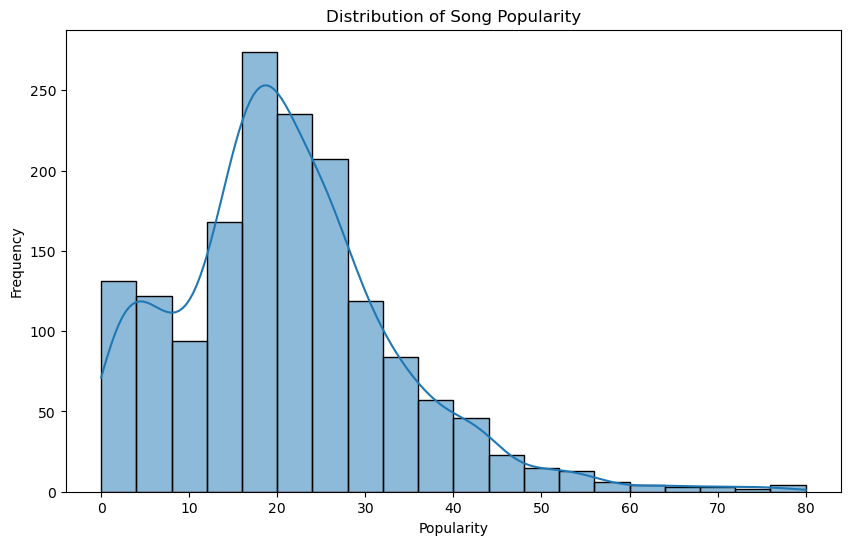

In [18]:
# Plot the distribution of song popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

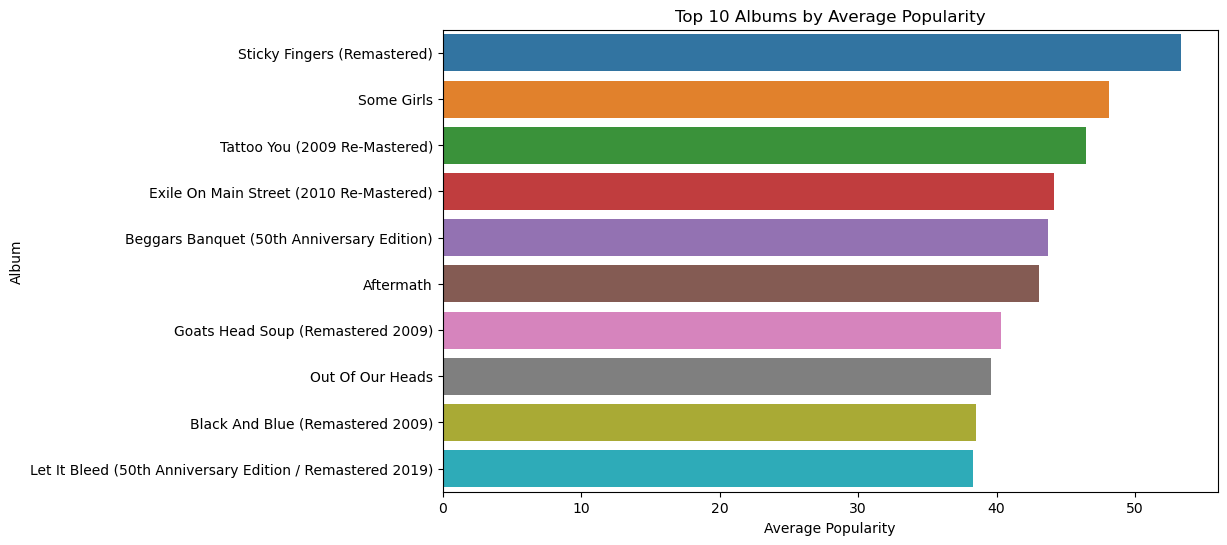

In [19]:
# Number of popular songs per album
popular_songs_per_album = df.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_songs_per_album.values, y=popular_songs_per_album.index)
plt.title('Top 10 Albums by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album')
plt.show()

The above graph shows that Stickf Fingurs and Some Girl are top two albums on the bacis of popularity.

#  Feature Engineering and Dimensionality Reduction

In [36]:
# Selecting relevant features for clustering
features = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']]

In [37]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [38]:
# Applying PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

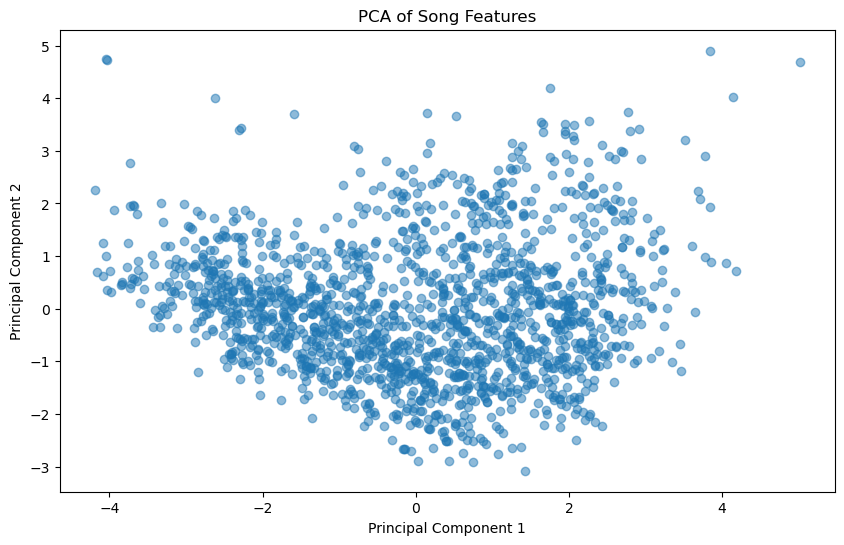

In [39]:
# Visualize PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5)
plt.title('PCA of Song Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Cluster Analysis

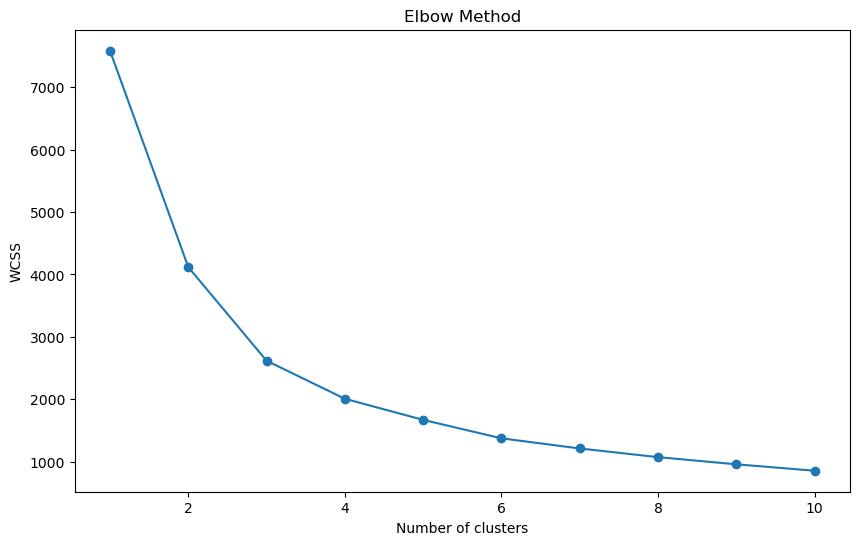

In [40]:
# Determine the number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
# From the elbow the optimal number of clusters is 6
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(pca_features)

NameError: name 'data' is not defined